In [14]:
import numpy as np
from sympy import *
import matplotlib.pyplot as plt

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-fkbb9zdz because the default path (/tmp/cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [15]:
x = symbols('x')

pu = 40000 * (x - 1)**2 + 5.4e4
pl = 20000 * (x - 1)**2 + 1.73e5

dN = integrate(pl*x - pu*x, (x, 0, 1))

dN

57833.3333333333

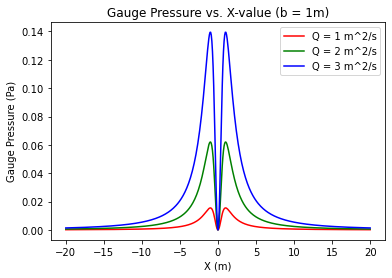

In [64]:
# Example 1: b = 1m

rho = 1.225 # kg/m^3
Q = [1, 2, 3] #m^2/s
b = 1 #m
x = np.linspace(-20, 20, 499)

v1 = Q[0]*x/np.pi/(x**2 + b**2)
p_gauge_1 = 0.5 * rho * v1**2

v2 = Q[1]*x/np.pi/(x**2 + b**2)
p_gauge_2 = 0.5 * rho * v2**2

v3 = Q[2]*x/np.pi/(x**2 + b**2)
p_gauge_3 = 0.5 * rho * v3**2

plt.plot(x, p_gauge_1, 'r-', label='Q = 1 m^2/s')
plt.plot(x, p_gauge_2, 'g-', label='Q = 2 m^2/s')
plt.plot(x, p_gauge_3, 'b-', label='Q = 3 m^2/s')
plt.title('Gauge Pressure vs. X-value (b = 1m)')
plt.legend()
plt.xlabel('X (m)')
plt.ylabel('Gauge Pressure (Pa)')
plt.show()

Text(0, 0.5, 'Gauge Pressure (Pa)')

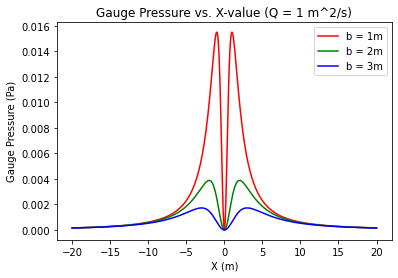

In [63]:
# Example 2: Q = 1 m^2/s

rho = 1.225 # kg/m^3
Q = 1 #m^2/s
b = [1, 2, 3] #m
x = np.linspace(-20, 20, 499)

v1 = Q*x/np.pi/(x**2 + b[0]**2)
p_gauge_1 = 0.5 * rho * v1**2

v2 = Q*x/np.pi/(x**2 + b[1]**2)
p_gauge_2 = 0.5 * rho * v2**2

v3 = Q*x/np.pi/(x**2 + b[2]**2)
p_gauge_3 = 0.5 * rho * v3**2

plt.plot(x, p_gauge_1, 'r-', label='b = 1m')
plt.plot(x, p_gauge_2, 'g-', label='b = 2m')
plt.plot(x, p_gauge_3, 'b-', label='b = 3m')
plt.title('Gauge Pressure vs. X-value (Q = 1 m^2/s)')
plt.legend()
plt.xlabel('X (m)')
plt.ylabel('Gauge Pressure (Pa)')

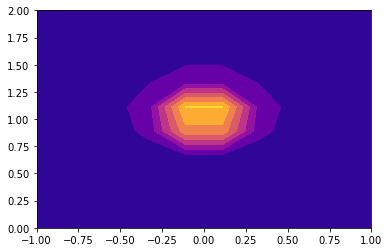

In [130]:
Q = 50
b = 1
x = np.linspace(-1, 1, 10)
z = np.linspace(0, 2, 10)
X, Z = np.meshgrid(x, z)

u = Q*X/2/np.pi*((X**2 + (Z-b)**2)**(-1) + (X**2 + (Z+b)**2)**(-1))
w = Q/2/np.pi*((Z-b)/(X**2 + (Z-b)**2) + (Z+b)/(X**2 + (Z+b)**2))
v = (u**2 + w**2)**(0.5)

p_gauge = 0.5 * rho * v**2

plt.contourf(X, Z, p_gauge, cmap='plasma')

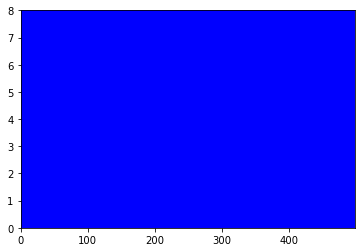

In [72]:
x = np.arange(1, 10)
y = x.reshape(-1, 1)
h = x
* y

cs = plt.contourf(h, levels=[10, 30, 50],
    colors=['#808080', '#A0A0A0', '#C0C0C0'], extend='both')
cs.cmap.set_over('red')
cs.cmap.set_under('blue')
cs.changed()